# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

Just go along with this notebook and try to complete the instructions or answer the questions in bold using your Python and Data Science skills!

## Data and Setup

____
** Import numpy and pandas **

In [86]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [87]:
import matplotlib.pyplot as py
import matplotlib as mpl
%matplotlib inline

In [88]:
# Standard plotly imports
from chart_studio.plotly import plot, iplot as py
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
from plotly.subplots import make_subplots


** Read in the csv file as a dataframe called df **

In [89]:
df=pd.read_csv("911.csv")

** Check the info() of the df **

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [91]:
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 17:40:01   LOWER POTTSGROVE   

                         addr  e  
0      REINDEER CT & DEAD END  1  
1  BRIAR PATH & WHITEMARSH LN  1  
2                    HAWS AVE  1  
3          AIRY ST & SWEDE ST  1  
4    CHERRYWOOD CT & DEAD END  1

## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [92]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [93]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [94]:
df['title'].nunique()

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [95]:
df["Reason"]=df['title'].apply(lambda x:x.split(':')[0])

In [96]:
df.sample(frac=0.0001)

lat        lng  \
14430  40.134900 -75.061823   
58415  40.097222 -75.376195   
10984  40.160564 -75.377437   
48779  40.008531 -75.252404   
57506  40.192104 -75.239369   
35173  40.251523 -75.329557   
14200  40.012127 -75.285926   
2299   40.243046 -75.613950   
48507  40.260482 -75.227985   
83477  40.064251 -75.140848   

                                                    desc      zip  \
14430  CATHEDRAL RD & HUNTINGDON PIKE; BRYN ATHYN; 20...  19006.0   
58415  SCHUYLKILL EXPY & RAMP N GULPH RD TO I76 EB; U...      NaN   
10984  GERMANTOWN PIKE & VIENNA AVE; WORCESTER; 2016-...  19403.0   
48779  HAVERFORD AVE & MONTGOMERY AVE; LOWER MERION; ...  19072.0   
57506  BRUSHTOWN RD & SUMNEYTOWN PIKE; LOWER GWYNEDD;...  19002.0   
35173  CREEK WAY & DEAD END;  TOWAMENCIN; Station 345...      NaN   
14200  ST GEORGES RD & EDGEWOOD RD;  LOWER MERION; St...  19003.0   
2299   ARMAND HAMMER BLVD & SUNSET DR;  POTTSTOWN; St...  19464.0   
48507  BRIGHTON CIR & CHATHAM PL; MONTGOMERY; 2016-04...  19446.0   
83477  CHELTENHAM AVE & N 15TH ST;  CHELTENHAM; Stati...  19027.0   

                             title            timeStamp            twp  \
14430  Traffic: DISABLED VEHICLE -  2016-01-17 13:12:01     BRYN ATHYN   
58415           Fire: VEHICLE FIRE  2016-05-10 19:17:09   UPPER MERION   
10984          Fire: BUILDING FIRE  2016-01-09 07:47:00      WORCESTER   
48779  Traffic: ROAD OBSTRUCTION -  2016-04-14 11:02:01   LOWER MERION   
57506  Traffic: VEHICLE ACCIDENT -  2016-05-08 11:02:00  LOWER GWYNEDD   
35173         EMS: SUBJECT IN PAIN  2016-03-08 05:17:01     TOWAMENCIN   
14200               EMS: DIZZINESS  2016-01-16 17:01:01   LOWER MERION   
2299        EMS: CARDIAC EMERGENCY  2015-12-16 14:37:01      POTTSTOWN   
48507             Fire: FIRE ALARM  2016-04-13 14:52:00     MONTGOMERY   
83477      EMS: DIABETIC EMERGENCY  2016-07-14 20:02:01     CHELTENHAM   

                                              addr  e   Reason  
14430               CATHEDRAL RD & HUNTINGDON PIKE  1  Traffic  
58415  SCHUYLKILL EXPY & RAMP N GULPH RD TO I76 EB  1     Fire  
10984                 GERMANTOWN PIKE & VIENNA AVE  1     Fire  
48779               HAVERFORD AVE & MONTGOMERY AVE  1  Traffic  
57506               BRUSHTOWN RD & SUMNEYTOWN PIKE  1  Traffic  
35173                         CREEK WAY & DEAD END  1      EMS  
14200                  ST GEORGES RD & EDGEWOOD RD  1      EMS  
2299                ARMAND HAMMER BLVD & SUNSET DR  1      EMS  
48507                    BRIGHTON CIR & CHATHAM PL  1     Fire  
83477                   CHELTENHAM AVE & N 15TH ST  1      EMS

** What is the most common Reason for a 911 call based off of this new column? **

In [97]:
df["Reason"].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

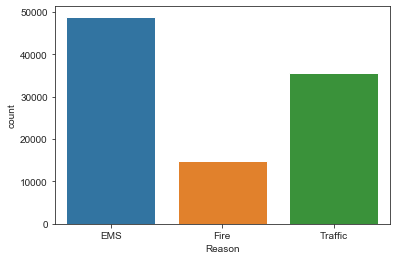

In [98]:
import seaborn as sns
fig=sns.countplot(df["Reason"])

In [99]:

hist1=px.histogram(
        df,
        x='Reason', barmode='relative',histnorm='percent',
        labels={'x':'Reason','y':'Percentage'},
    ).data[0]
hist1.hovertemplate='Reason - %{x}<br> Percentage - %{y:.2f}% <extra></extra>'
layout=go.Layout(
    title="",
    template='plotly_dark',
)

fig1=go.Figure(hist1,layout=layout)
fig1.update_layout(
    title="Reasons for 911 calls",
    xaxis_title="Reason",
    yaxis_title="Percent",
    font=dict(
        family="Trebuchet MS, monospace",
        size=18,
        color="#FFF"
    )
)
fig1.update_traces(marker_color='#19d3f3')
fig1.show()

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [100]:
df['timeStamp'].dtypes

dtype('O')

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [101]:
df['timeStamp']=df['timeStamp'].apply(pd.to_datetime)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   lat        99492 non-null  float64       
 1   lng        99492 non-null  float64       
 2   desc       99492 non-null  object        
 3   zip        86637 non-null  float64       
 4   title      99492 non-null  object        
 5   timeStamp  99492 non-null  datetime64[ns]
 6   twp        99449 non-null  object        
 7   addr       98973 non-null  object        
 8   e          99492 non-null  int64         
 9   Reason     99492 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 7.6+ MB


** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [103]:
df["Hour"]=df["timeStamp"].apply(lambda x:x.hour)
df["Month"]=df["timeStamp"].apply(lambda x:x.month)


In [104]:
df["Day of Week"]=df["timeStamp"].apply(lambda x:x.dayofweek)

In [105]:
df.sample(frac=0.000025)

lat        lng  \
50969  40.262132 -75.368407   
99169  40.095745 -75.401084   

                                                    desc      zip  \
50969  MAIN ST & RUTH CT; LOWER SALFORD; 2016-04-20 @...  19438.0   
99169  CLARK AVE & 1ST AVE;  UPPER MERION; Station 31...  19406.0   

                             title           timeStamp            twp  \
50969  Traffic: VEHICLE ACCIDENT - 2016-04-20 07:21:00  LOWER SALFORD   
99169       EMS: CARDIAC EMERGENCY 2016-08-23 15:02:01   UPPER MERION   

                      addr  e   Reason  Hour  Month  Day of Week  
50969    MAIN ST & RUTH CT  1  Traffic     7      4            2  
99169  CLARK AVE & 1ST AVE  1      EMS    15      8            1

** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [106]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df["Day of Week"]=df["Day of Week"].map(dmap)

** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

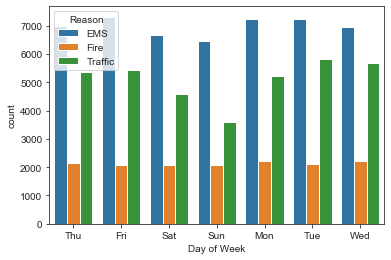

In [107]:
fig=sns.countplot(df['Day of Week'],hue=df['Reason'])

In [108]:
hist2=px.histogram(
        data_frame=df,
        x='Day of Week',
        color='Reason',
        barmode='relative',histnorm='percent',
        category_orders={'Day of Week':['Mon','Tue','Wed','Thu','Fri','Sat','Sun']},
)
for datas in hist2.data:
    reason=datas.hovertemplate.split('=')[1].split('<br>')[0]
    datas.hovertemplate='Reason - '+reason+'<br>Day of the Week - %{x}<br>Percentage - %{y:.2f}% <extra></extra>'
fig2=go.Figure(hist2)
fig2.update_layout(
    title="Reasons for 911 calls",
    xaxis_title="Reason",
    yaxis_title="Percentage",
    font=dict(
        family="Trebuchet MS, monospace",
        size=18,
        color="#FFF"
    ),
    template='plotly_dark',
    
)
fig2.show()


In [109]:
smap = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df["Months"]=df["Month"].map(smap)
df.drop("Month",axis=1,inplace=True)
df.sample(5)

lat        lng  \
23657  40.152321 -75.398510   
15403  40.264484 -75.649269   
30868  40.189588 -75.541849   
62923  40.184823 -75.496709   
17768  40.181521 -75.096570   

                                                    desc      zip  \
23657  RIDGE PIKE & HIGHLAND AVE;  LOWER PROVIDENCE; ...  19403.0   
15403  RT100 SB & N STATE ST; UPPER POTTSGROVE; 2016-...  19464.0   
30868  5TH AVE & SPRUCE ST; ROYERSFORD; 2016-02-25 @ ...  19468.0   
62923  OLD STATE RD & MARSHWOOD DR;  UPPER PROVIDENCE...  19468.0   
17768  LINCOLN AVE & SUMMIT AVE;  HATBORO; Station 38...  19040.0   

                             title           timeStamp               twp  \
23657        EMS: SYNCOPAL EPISODE 2016-02-07 10:07:00  LOWER PROVIDENCE   
15403  Traffic: DISABLED VEHICLE - 2016-01-20 07:52:00  UPPER POTTSGROVE   
30868  Traffic: ROAD OBSTRUCTION - 2016-02-25 08:42:01        ROYERSFORD   
62923             EMS: FALL VICTIM 2016-05-22 23:17:01  UPPER PROVIDENCE   
17768             EMS: FALL VICTIM 2016-01-24 11:17:00           HATBORO   

                              addr  e   Reason  Hour Day of Week Months  
23657    RIDGE PIKE & HIGHLAND AVE  1      EMS    10         Sun    Feb  
15403        RT100 SB & N STATE ST  1  Traffic     7         Wed    Jan  
30868          5TH AVE & SPRUCE ST  1  Traffic     8         Thu    Feb  
62923  OLD STATE RD & MARSHWOOD DR  1      EMS    23         Sun    May  
17768     LINCOLN AVE & SUMMIT AVE  1      EMS    11         Sun    Jan

**Now do the same for Month:**

In [110]:
hist21=px.histogram(
        data_frame=df,
        x='Months',
        color='Reason',
        barmode='relative',histnorm='percent',
        category_orders={'Months':['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']},
)
for datas in hist21.data:
    reason=datas.hovertemplate.split('=')[1].split('<br>')[0]
    datas.hovertemplate='Reason - '+reason+'<br>Month - %{x}<br>Percentage - %{y:.2f}% <extra></extra>'
fig21=go.Figure(hist21)
fig21.update_layout(
    title="Reasons for 911 calls, by month",
    xaxis_title="Reason",
    yaxis_title="Percentage",
    font=dict(
        family="Trebuchet MS, monospace",
        size=18,
        color="#FFF"
    ),
    template='plotly_dark',
    
)
fig21.show()


**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [111]:
byMonth=df.groupby(['Months']).count()
byMonth.head()


lat    lng   desc    zip  title  timeStamp    twp   addr      e  \
Months                                                                      
Apr     11326  11326  11326   9895  11326      11326  11323  11283  11326   
Aug      9078   9078   9078   7832   9078       9078   9073   9025   9078   
Dec      7969   7969   7969   6907   7969       7969   7963   7916   7969   
Feb     11467  11467  11467   9930  11467      11467  11465  11396  11467   
Jan     13205  13205  13205  11527  13205      13205  13203  13096  13205   

        Reason   Hour  Day of Week  
Months                              
Apr      11326  11326        11326  
Aug       9078   9078         9078  
Dec       7969   7969         7969  
Feb      11467  11467        11467  
Jan      13205  13205        13205

** Now create a simple plot off of the dataframe indicating the count of calls per month. **

In [112]:
byMonth1=byMonth.reset_index()
#byMonth1.sort_values(by='twp',inplace=True,ascending=False
sorter=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Dec']
byMonth1['Months']= pd.Categorical(byMonth1['Months'], sorter)
byMonth1.sort_values("Months",inplace=True)

byMonth1.head()

Months    lat    lng   desc    zip  title  timeStamp    twp   addr      e  \
4    Jan  13205  13205  13205  11527  13205      13205  13203  13096  13205   
3    Feb  11467  11467  11467   9930  11467      11467  11465  11396  11467   
7    Mar  11101  11101  11101   9755  11101      11101  11092  11059  11101   
0    Apr  11326  11326  11326   9895  11326      11326  11323  11283  11326   
8    May  11423  11423  11423   9946  11423      11423  11420  11378  11423   

   Reason   Hour  Day of Week  
4   13205  13205        13205  
3   11467  11467        11467  
7   11101  11101        11101  
0   11326  11326        11326  
8   11423  11423        11423

In [113]:
byMonth1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 4 to 2
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Months       9 non-null      category
 1   lat          9 non-null      int64   
 2   lng          9 non-null      int64   
 3   desc         9 non-null      int64   
 4   zip          9 non-null      int64   
 5   title        9 non-null      int64   
 6   timeStamp    9 non-null      int64   
 7   twp          9 non-null      int64   
 8   addr         9 non-null      int64   
 9   e            9 non-null      int64   
 10  Reason       9 non-null      int64   
 11  Hour         9 non-null      int64   
 12  Day of Week  9 non-null      int64   
dtypes: category(1), int64(12)
memory usage: 1.3 KB


In [114]:

hist3=px.line(
        byMonth1,
        x='Months',y='twp',
        labels={'x':'Month','y':'Count'},
        category_orders={'Months':['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Dec']},
    ).data[0]
hist3.hovertemplate='Month - %{x}<br> Count - %{y} <extra></extra>'
layout3=go.Layout(
    title="",
    template='plotly_dark',
)

fig3=go.Figure(hist3,layout=layout3)
fig3.update_layout(
    title="911 Calls by month",
    xaxis_title="Month",
    yaxis_title="Count",

    font=dict(
        family="Trebuchet MS, monospace",
        size=18,
        color="#FFF"
    )
)
fig3.update_traces(marker_color='#19d3f3')
fig3.show()
#hist3.show()

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

In [115]:
sorter1=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Dec']
sorter2=dict(zip(sorter1,range(len(sorter1))))
byMonth1['MonthNumber']=byMonth1['Months'].map(sorter2)
byMonth1['MonthNumber']=byMonth1['MonthNumber'].astype('int64')
byMonth1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 4 to 2
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Months       9 non-null      category
 1   lat          9 non-null      int64   
 2   lng          9 non-null      int64   
 3   desc         9 non-null      int64   
 4   zip          9 non-null      int64   
 5   title        9 non-null      int64   
 6   timeStamp    9 non-null      int64   
 7   twp          9 non-null      int64   
 8   addr         9 non-null      int64   
 9   e            9 non-null      int64   
 10  Reason       9 non-null      int64   
 11  Hour         9 non-null      int64   
 12  Day of Week  9 non-null      int64   
 13  MonthNumber  9 non-null      int64   
dtypes: category(1), int64(13)
memory usage: 1.4 KB


In [116]:
import statsmodels.api as sm
hist4,trendline=px.scatter(
        byMonth1,
        x='MonthNumber',y='twp',
        labels={'x':'Month Number','y':'Count of calls'},
        trendline="ols",
        trendline_color_override="#19d3f3"
).data
# print(hist4)
hist4.hovertemplate='Month - %{x}<br> Count - %{y} <extra></extra>'
layout=go.Layout(
    title="",
    template='plotly_dark',
)
fig4=go.Figure([hist4,trendline],layout=layout)
fig4.update_layout(
    title="Reasons for 911 calls",
    xaxis_title="Month Number",
    yaxis_title="Count",
    font=dict(
        family="Trebuchet MS, monospace",
        size=18,
        color="#FFF"
    )
)
fig4.update_traces(marker_color='#19d3f3')

fig4.show()


**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [117]:
df["Date"]=df["timeStamp"].apply(lambda x:x.date())
df.sample(2)

lat        lng  \
21113  40.196225 -75.298712   
96713  40.026229 -75.322005   

                                                    desc      zip  \
21113  MORRIS RD & PRIMROSE DR;  WORCESTER; Station 3...  19446.0   
96713  W MONTGOMERY AVE & N ROBERTS RD; LOWER MERION;...  19010.0   

                             title           timeStamp           twp  \
21113             EMS: DEHYDRATION 2016-01-31 18:47:00     WORCESTER   
96713  Traffic: DISABLED VEHICLE - 2016-08-17 08:41:41  LOWER MERION   

                                  addr  e   Reason  Hour Day of Week Months  \
21113          MORRIS RD & PRIMROSE DR  1      EMS    18         Sun    Jan   
96713  W MONTGOMERY AVE & N ROBERTS RD  1  Traffic     8         Wed    Aug   

             Date  
21113  2016-01-31  
96713  2016-08-17

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [118]:
byDateFire=df[df['Reason']=='Fire'].groupby(['Date']).count()
byDateEMS=df[df['Reason']=='EMS'].groupby(['Date']).count()
byDateTraffic=df[df['Reason']=='Traffic'].groupby(['Date']).count()
byDateFire.reset_index(inplace=True)
byDateEMS.reset_index(inplace=True)
byDateTraffic.reset_index(inplace=True)
byDates=pd.DataFrame({})
byDates['Date']=byDateFire['Date'].map(str)
byDates['Fire']=byDateFire['twp'].map(np.int64)
byDates['EMS']=byDateEMS['twp']
byDates['Traffic']=byDateTraffic['twp']
byDates.sample(5)

Date  Fire  EMS  Traffic
205  2016-07-02    53  162       83
51   2016-01-30    49  168      134
60   2016-02-08    53  186      124
34   2016-01-13    66  185      179
136  2016-04-24    60  190       62

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

In [119]:
melt_byDate = byDates.melt(id_vars='Date', value_vars=['Fire', 'EMS','Traffic'])

In [120]:

Fire,EMS,Traffic=px.line(
        melt_byDate,
        x='Date',y='value',color='variable',
        labels={'x':'Month','y':'Count'},
).data

Fire.hovertemplate='Reason - Fire<br>Month - %{x}<br> Count - %{y} <extra></extra>'
EMS.hovertemplate='Reason - EMS<br>Month - %{x}<br> Count - %{y} <extra></extra>'
Traffic.hovertemplate='Reason - Traffic<br>Month - %{x}<br> Count - %{y} <extra></extra>'
layout5=go.Layout(
    title="",
    template='plotly_dark',
    hovermode='x'
)
fig5=go.Figure([Fire,EMS,Traffic],layout=layout5)
fig5.update_layout(
    title="911 Calls by month",
    xaxis_title="Month",
    yaxis_title="Count",

    font=dict(
        family="Trebuchet MS, monospace",
        size=18,
        color="#FFF"
    )
)

fig5.update_traces(marker_color='#19d3f3')
fig5.show()

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [121]:
byHour=df.groupby(['Day of Week','Hour']).count()['Reason'].unstack()
lists=["12AM","1AM","2AM","3AM","4AM"
       ,"5AM","6AM","7AM","8AM","9AM","10AM"
       ,"11AM","12PM","1PM","2PM","3PM","4PM"
       ,"5PM","6PM","7PM","8PM","9PM","10PM"
       ,"11PM"]
mapList=dict(zip(lists,range(len(lists))))
mapList_iv = {v: k for k, v in mapList.items()}
byHourC=byHour.copy()
byHour.columns=byHour.columns.map(mapList_iv)
byHour.reset_index(inplace=True)
dayOfWeek=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
byHour['Day of Week']= pd.Categorical(byHour['Day of Week'], dayOfWeek)
byHour.sort_values('Day of Week',inplace=True)
byHour.index=byHour['Day of Week']
#byHour.drop('Day of Week',inplace=True)

** Now create a HeatMap using this new DataFrame. **

In [122]:

hmap = px.imshow(byHour,
              color_continuous_scale=px.colors.sequential.Viridis,
                aspect=(12,6),
               labels={'x':'Hour','y':'Day of Week'},
                y=dayOfWeek,x=byHour.columns
                 
                )
hmap.update_layout(
    title="911 Calls Heatmap by Hour and Day of the Week",
    xaxis_title="Hour",
    yaxis_title="Day of Week",
    template='plotly_dark',
    font=dict(
        family="Trebuchet MS, monospace",
        size=12,
        color="#FFF"
    ),
    width=900,
    height=768
)

hmap.show()

** Now create a clustermap using this DataFrame. **

In [123]:
byHour.drop('Day of Week',inplace=True,axis=1)

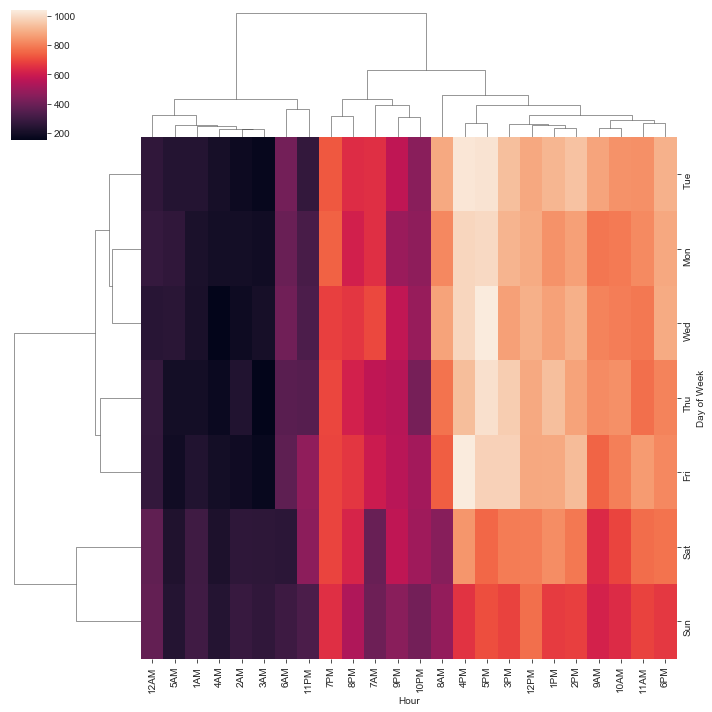

In [124]:
sns.set_style('ticks')
sns.clustermap(byHour)

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [126]:
byMonth=df.groupby(['Day of Week','Months']).count()['Reason'].unstack()

byMonth.reset_index(inplace=True)
dayOfWeek=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
byMonth['Day of Week']= pd.Categorical(byMonth['Day of Week'], dayOfWeek)
byMonth.sort_values('Day of Week',inplace=True)
byMonth.index=byMonth['Day of Week']
byMonth.drop('Day of Week',inplace=True,axis=1)
sorter1=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Dec']
byMonth = byMonth.reindex(columns=sorter1)
byMonth.head()

Months        Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Dec
Day of Week                                                      
Mon          1727  1964  1535  1598  1779  1617  1692  1511  1257
Tue          1973  1753  1884  1430  1918  1676  1670  1612  1234
Wed          1700  1903  1889  1517  1538  2058  1717  1295  1262
Thu          1584  1596  1900  1601  1590  2065  1646  1230  1266
Fri          1970  1581  1525  1958  1730  1649  2045  1310  1065

In [127]:

hmap = px.imshow(byMonth,
              color_continuous_scale=px.colors.sequential.Viridis,
                aspect=(12,6),
               labels={'x':'Hour','y':'Month'},
                y=dayOfWeek,x=byMonth.columns
                 
                )
hmap.update_layout(
    title="911 Calls by month",
    xaxis_title="Month",
    yaxis_title="Day of Week",
    template='plotly_dark',
    font=dict(
        family="Trebuchet MS, monospace",
        size=12,
        color="#FFF"
    ),
    width=900,
    height=768
)

hmap.show()

**Continue exploring the Data however you see fit!**
# Great Job!